#                                       Explore US-BikeShare Data

## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, we have performed an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: ***New York City(NYC)***, ***Chicago***, and ***Washington***, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

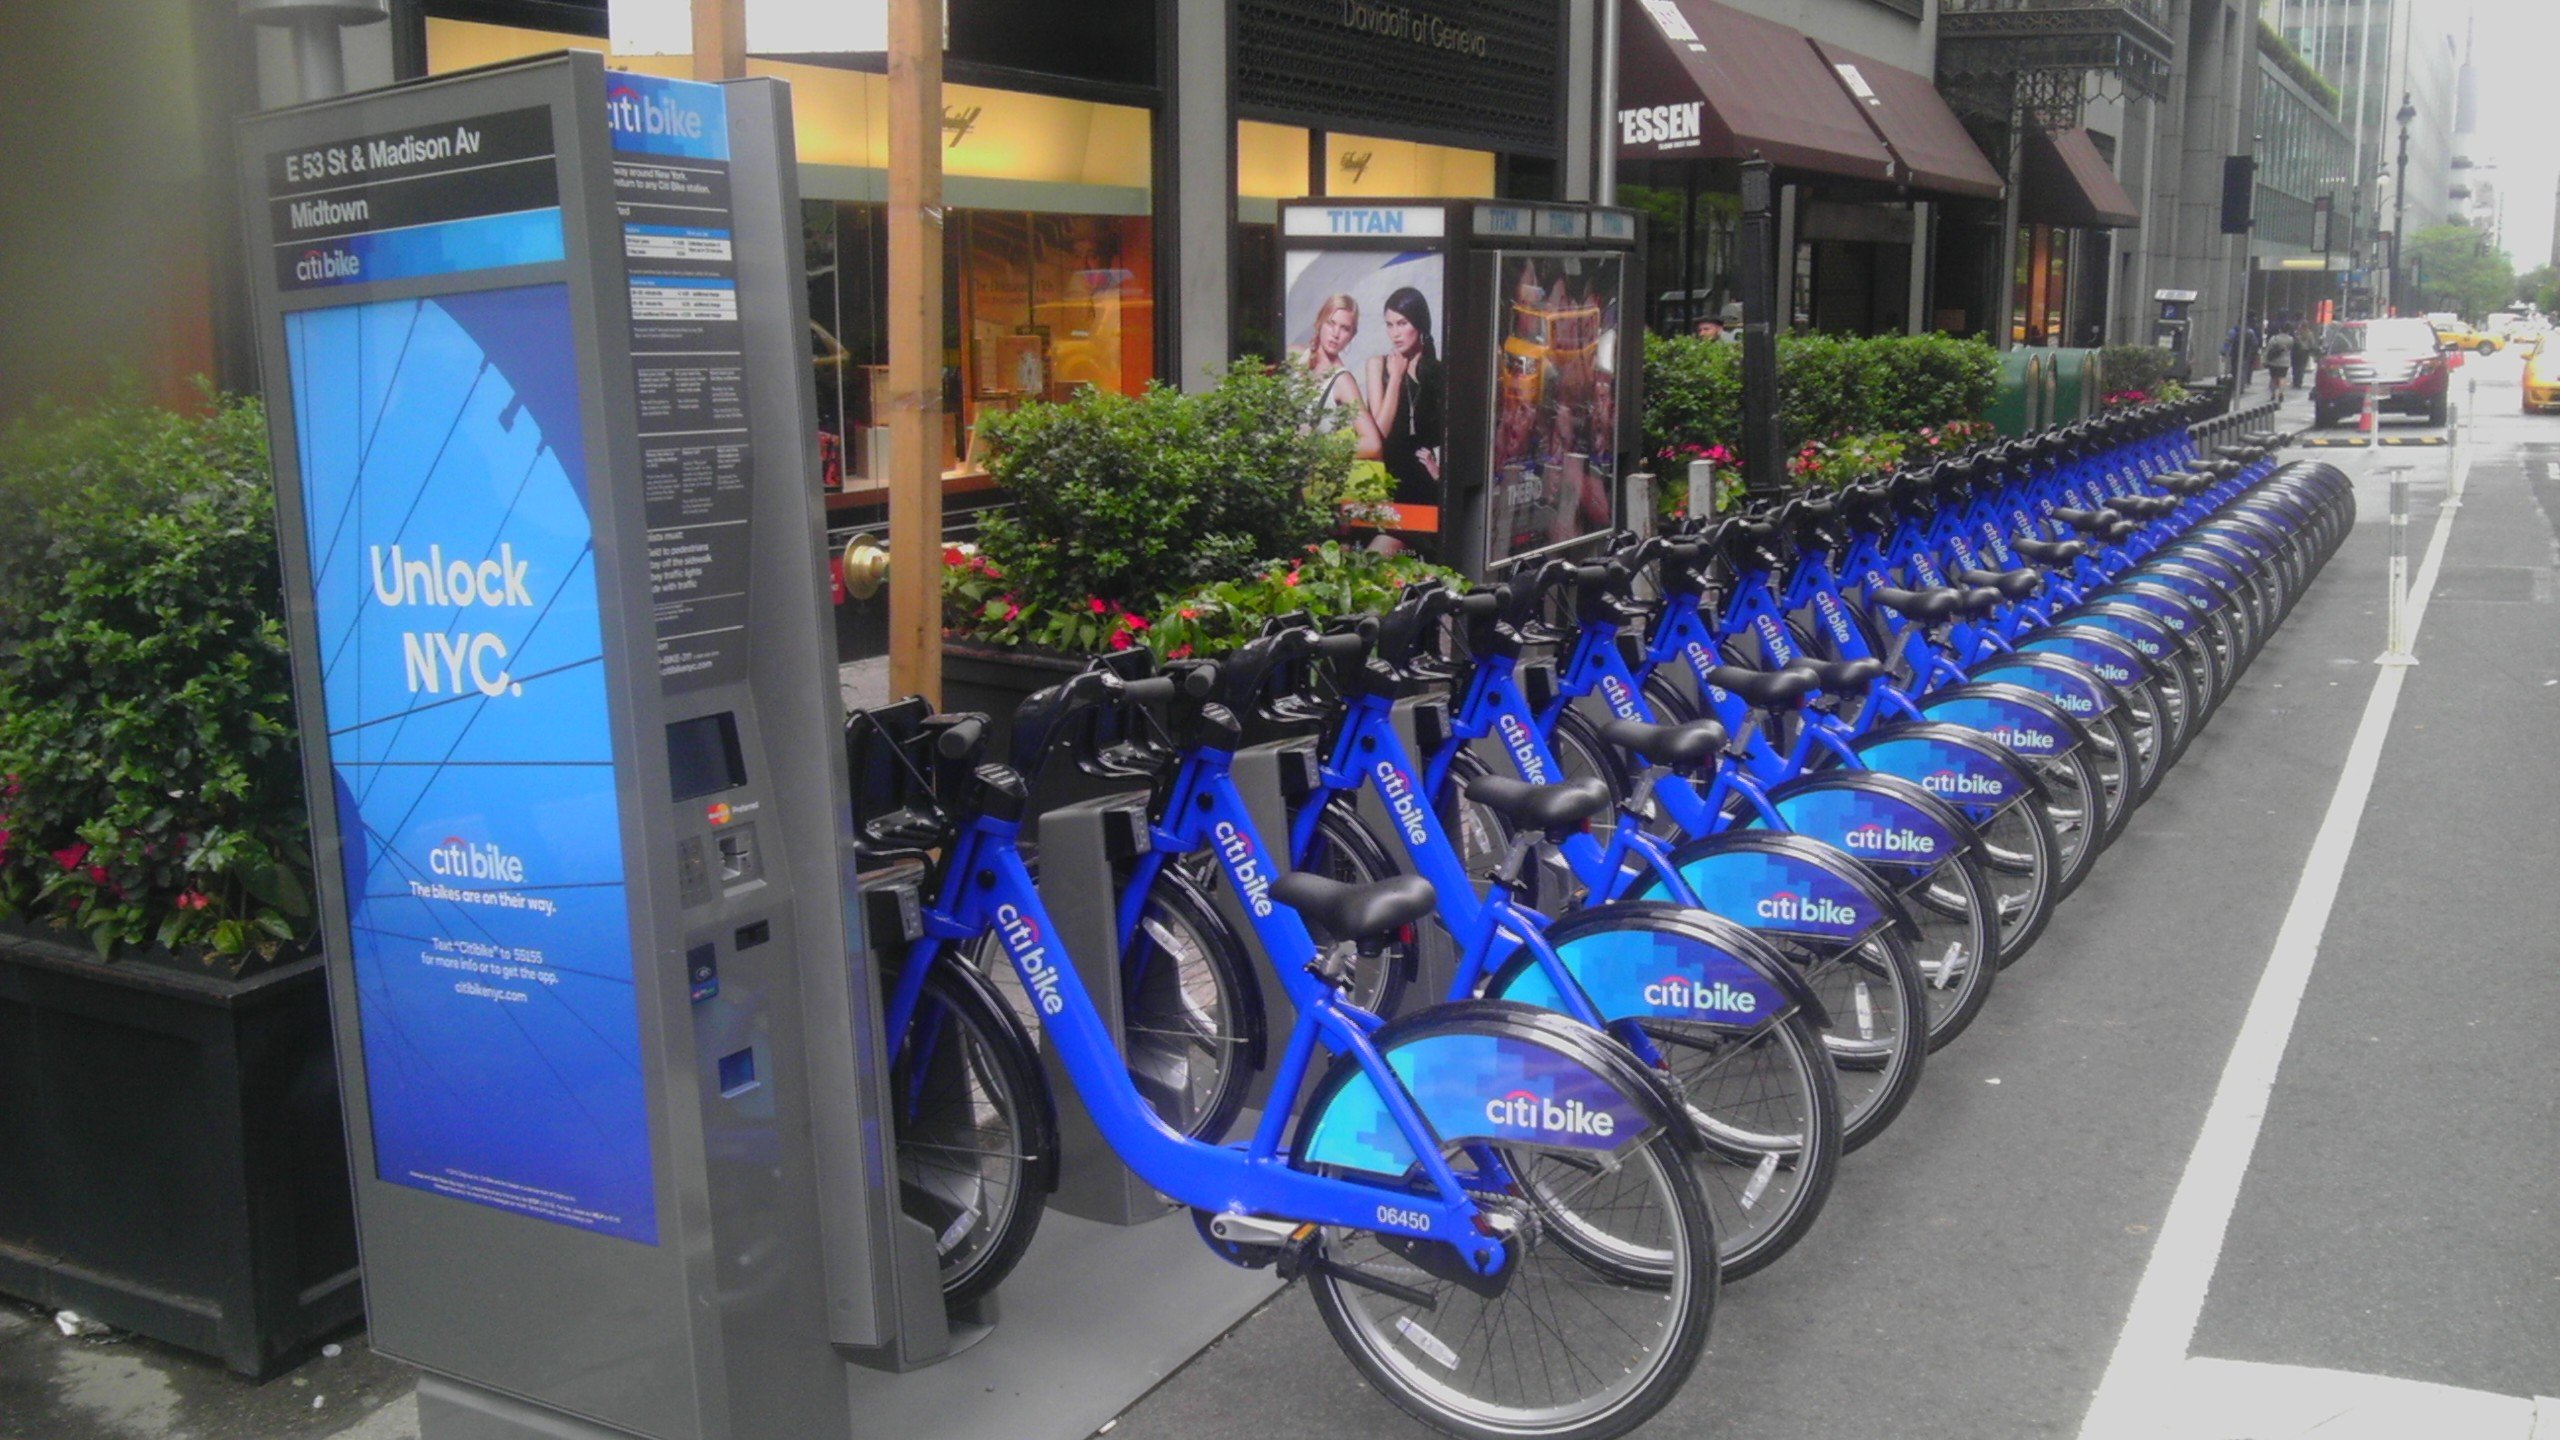

In [1]:
from IPython.core.display import Image, display
display(Image(filename='bikesharecom.jpg'))

### Importing Libraries For Data Analysis

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
#--------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

### Reading Data:        ***NYC***,***Washington***,***Chicago***
**File are in csv format**

In [3]:
data_wash = pd.read_csv('data/Washington-2016-Summary.csv')
data_nyc = pd.read_csv('data/NYC-2016-Summary.csv')
data_chi = pd.read_csv('data/Chicago-2016-Summary.csv')

## Data Stored In Files


In [4]:
data_wash

,duration,month,hour,day_of_week,user_type
0,7.123117,3,22,Thursday,Subscriber
1,9.792517,3,22,Thursday,Subscriber
2,6.632983,3,22,Thursday,Subscriber
3,7.404700,3,22,Thursday,Subscriber
4,13.014583,3,22,Thursday,Subscriber
5,17.055200,3,22,Thursday,Subscriber
6,11.011650,3,22,Thursday,Subscriber
7,30.011750,3,21,Thursday,Subscriber
8,3.626817,3,21,Thursday,Subscriber
9,6.592133,3,21,Thursday,Subscriber


In [5]:
data_nyc.head()

,duration,month,hour,day_of_week,user_type
0,13.983333,1,0,Friday,Customer
1,11.433333,1,0,Friday,Subscriber
2,5.250000,1,0,Friday,Subscriber
3,12.316667,1,0,Friday,Subscriber
4,20.883333,1,0,Friday,Customer


In [6]:
data_chi.head()

,duration,month,hour,day_of_week,user_type
0,15.433333,3,23,Thursday,Subscriber
1,3.300000,3,22,Thursday,Subscriber
2,2.066667,3,22,Thursday,Subscriber
3,19.683333,3,22,Thursday,Subscriber
4,10.933333,3,22,Thursday,Subscriber


In [7]:
data_wash.dtypes

duration       float64
month            int64
hour             int64
day_of_week     object
user_type       object
dtype: object

In [8]:
data_nyc.dtypes

duration       float64
month            int64
hour             int64
day_of_week     object
user_type       object
dtype: object

In [9]:
data_chi.dtypes

duration       float64
month            int64
hour             int64
day_of_week     object
user_type       object
dtype: object

**Checking If Data Is Clean Or Not, If Data has Null Values then we have to to Fill them with Mean or Media of Data According to Data .So, that Data Become Good For Prediction **

In [10]:
data_nyc.isnull().sum()

duration         0
month            0
hour             0
day_of_week      0
user_type      717
dtype: int64

** NOTE:--> NYC contain NULL VAlUES **

In [11]:
data_wash.isnull().sum()

duration       0
month          0
hour           0
day_of_week    0
user_type      0
dtype: int64

In [12]:
data_chi.isnull().sum()

duration       0
month          0
hour           0
day_of_week    0
user_type      0
dtype: int64

**Shape Of Data**

In [13]:
data_chi.shape

(72131, 5)

In [14]:
data_wash.shape

(66326, 5)

In [15]:
data_nyc.shape

(276798, 5)

**Now we are counting on what Day of week how many Riders came for Bikes
**

In [16]:
count_nyc = data_nyc.groupby('day_of_week').count()['user_type']
count_wash = data_wash.groupby('day_of_week').count()['user_type']
count_chi = data_chi.groupby('day_of_week').count()['user_type']
print(count_nyc, count_wash, count_chi)

day_of_week
Friday       41276
Monday       39243
Saturday     33195
Sunday       31230
Thursday     44262
Tuesday      42320
Wednesday    44555
Name: user_type, dtype: int64 day_of_week
Friday        9970
Monday        9394
Saturday      8900
Sunday        8227
Thursday      9984
Tuesday       9748
Wednesday    10103
Name: user_type, dtype: int64 day_of_week
Friday       10741
Monday       11286
Saturday      9927
Sunday        9654
Thursday     10008
Tuesday      10911
Wednesday     9604
Name: user_type, dtype: int64


**Showing Data In Graphically form**

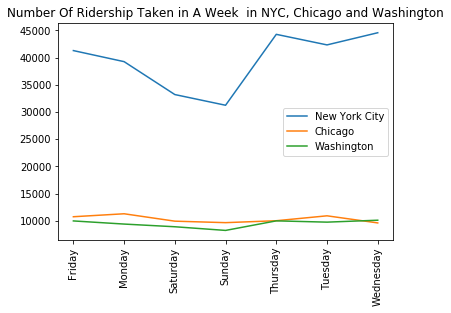

In [17]:
x=[0,1,2,3,4,5,6]
my_xticks=['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
plt.plot(x,count_nyc, label='New York City')
plt.plot(x,count_chi , label='Chicago')
plt.plot(x,count_wash, label='Washington')
plt.xticks(x, my_xticks,rotation=90)
plt.title('Number Of Ridership Taken in A Week  in NYC, Chicago and Washington')
plt.legend()
plt.show()

**Comparing What is the count of user in each month throughout the year in each City**

In [18]:
month_nyc = data_nyc.groupby('month').count()['user_type']
month_chi= data_chi.groupby('month').count()['user_type']
month_wash = data_wash.groupby('month').count()['user_type']
print(month_nyc, month_wash, month_chi)

month
1     10180
2     11170
3     18413
4     20160
5     24455
6     29242
7     27522
8     31104
9     32699
10    31145
11    23908
12    16083
Name: user_type, dtype: int64 month
1     2434
2     2854
3     5571
4     5602
5     5768
6     7320
7     7341
8     7198
9     6878
10    6792
11    5214
12    3354
Name: user_type, dtype: int64 month
1      1901
2      2394
3      3719
4      4567
5      7211
6      9794
7     10286
8      9810
9      8700
10     7160
11     4811
12     1778
Name: user_type, dtype: int64


**Showing Data In Graphically form**

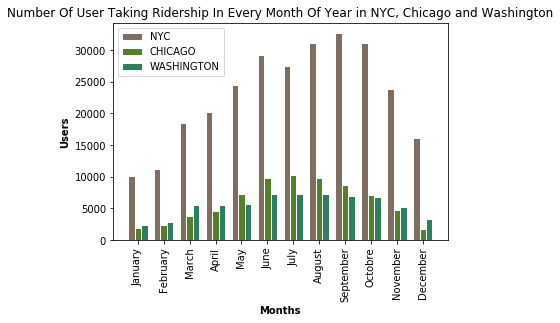

In [19]:
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(month_nyc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, month_nyc, color='#7f6d5f', width=barWidth, edgecolor='white', label='NYC')
plt.bar(r2, month_chi, color='#557f2d', width=barWidth, edgecolor='white', label='CHICAGO')
plt.bar(r3, month_wash, color='#2d7f5e', width=barWidth, edgecolor='white', label='WASHINGTON')
 
# Add xticks on the middle of the group bars
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Users', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(month_nyc))], ['January', 'February', 'March', 'April', 'May','June','July','August','September','Octobre','November','December'],rotation=90)
plt.title('Number Of User Taking Ridership In Every Month Of Year in NYC, Chicago and Washington')
# Create legend & Show graphic
plt.legend()
plt.show()

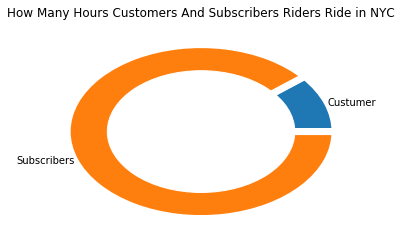

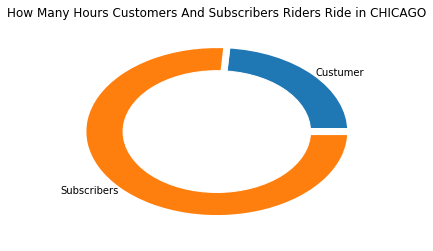

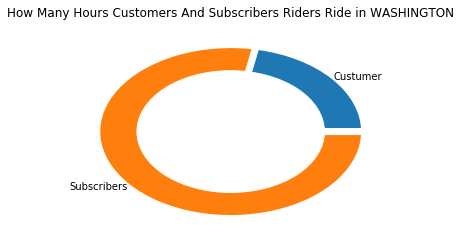

In [20]:
circular_nyc = data_nyc.groupby('user_type').count()['hour']
circular_chi = data_chi.groupby('user_type').count()['hour']
circular_wash = data_wash.groupby('user_type').count()['hour']
names='Custumer', 'Subscribers',
# Create a pieplot
plt.pie(circular_nyc, labels=names, labeldistance=1, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('How Many Hours Customers And Subscribers Riders Ride in NYC')
plt.show()
# Create a pieplot
plt.pie(circular_chi, labels=names, labeldistance=1, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('How Many Hours Customers And Subscribers Riders Ride in CHICAGO')
plt.show()
# Create a pieplot
plt.pie(circular_wash, labels=names, labeldistance=1, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('How Many Hours Customers And Subscribers Riders Ride in WASHINGTON')
plt.show()

In [21]:
bar_nyc = data_nyc['user_type'].count()
bar_chi = data_chi['user_type'].count()
bar_wash= data_wash['user_type'].count()
barh_nyc = data_nyc.groupby('user_type').count()['duration']
barh_chi = data_chi.groupby('user_type').count()['duration']
barh_wash =  data_wash.groupby('user_type').count()['duration']
print(barh_nyc / bar_nyc)
print(barh_chi / bar_chi)
print(barh_wash / bar_wash)


user_type
Customer      0.109334
Subscriber    0.890666
Name: duration, dtype: float64
user_type
Customer      0.237748
Subscriber    0.762252
Name: duration, dtype: float64
user_type
Customer      0.219718
Subscriber    0.780282
Name: duration, dtype: float64


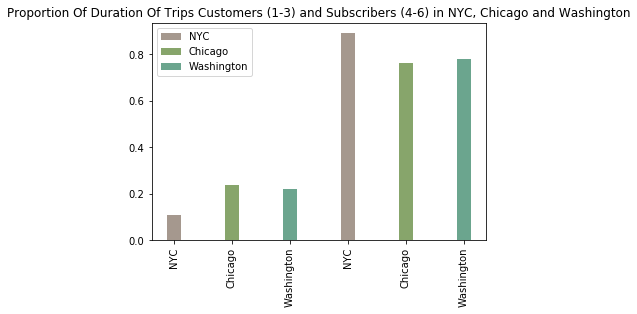

In [22]:
proportion_nyc = barh_nyc / bar_nyc
proportion_chi= barh_chi / bar_chi
proportion_wash = barh_wash / bar_wash
width = 0.25
my_xticks=['NYC','Chicago','Washington','NYC','Chicago','Washington']
x=[1,2,3,4,5,6]
proportion_bar_of_nyc = plt.bar([1,4], proportion_nyc, width, color='#7f6d5f', alpha=.7, label = 'NYC')
proportion_bar_of_chi= plt.bar([2,5], proportion_chi, width, color='#557f2d', alpha=.7, label = 'Chicago')
proportion_bar_of_wash = plt.bar([3,6], proportion_wash, width, color='#2d7f5e', alpha=.7, label = 'Washington')
plt.xticks(x, my_xticks,rotation=90)
plt.legend()
plt.title('Proportion Of Duration Of Trips Customers (1-3) and Subscribers (4-6) in NYC, Chicago and Washington')
plt.show()

# Applying Machine Learning On NYC Data

**We have applied ML on NYC Data. We have used Different type of Classifier for prediction**



In [23]:
data_nyc.head()

,duration,month,hour,day_of_week,user_type
0,13.983333,1,0,Friday,Customer
1,11.433333,1,0,Friday,Subscriber
2,5.250000,1,0,Friday,Subscriber
3,12.316667,1,0,Friday,Subscriber
4,20.883333,1,0,Friday,Customer


> **Data Contain string value Or Object datatype Data in Data Frame. So, we can not train Or test our model.Therefore, we convert Data into numeric form**

>> **We are also applying LABLE ENCODING for string --> numeric data conversion**

In [24]:
data_nyc['duration'] = data_nyc.duration.astype(int)

In [25]:
data_nyc.user_type=data_nyc.user_type.map({"Subscriber":0,"Customer":1})
data_nyc.day_of_week=data_nyc.day_of_week.map({"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7})
data_nyc.head()

,duration,month,hour,day_of_week,user_type
0,13,1,0,5,1.0
1,11,1,0,5,0.0
2,5,1,0,5,0.0
3,12,1,0,5,0.0
4,20,1,0,5,1.0


In [26]:
data_nyc.head()

,duration,month,hour,day_of_week,user_type
0,13,1,0,5,1.0
1,11,1,0,5,0.0
2,5,1,0,5,0.0
3,12,1,0,5,0.0
4,20,1,0,5,1.0


> ** As we Know that NYC contain NULL VALUES so we them by MEAN VALUE **

In [27]:
data_nyc.user_type= data_nyc.user_type.fillna(data_nyc.user_type.mean())

In [28]:
data_nyc.isnull().sum()

duration       0
month          0
hour           0
day_of_week    0
user_type      0
dtype: int64

In [29]:
data_nyc['user_type'] = data_nyc.user_type.astype(int)
data_nyc

,duration,month,hour,day_of_week,user_type
0,13,1,0,5,1
1,11,1,0,5,0
2,5,1,0,5,0
3,12,1,0,5,0
4,20,1,0,5,1
5,8,1,0,5,0
6,10,1,0,5,0
7,7,1,1,5,0
8,3,1,1,5,0
9,7,1,1,5,1


>> ** KNN Classification**

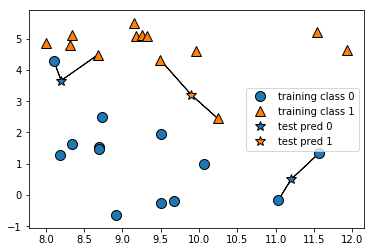

In [30]:
import matplotlib.pyplot as plt
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=2)
# How KNN works

In [31]:
# Loading Data form Data Frame For testing and training.
X = data_nyc.iloc[:,:-1].values
Y = data_nyc.iloc[:,-1]

In [32]:
X_train ,X_test  ,y_train ,y_test  = train_test_split(X,Y,test_size= 30,random_state=10)

In [33]:
Knn =  KNeighborsClassifier()
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
# Predicting Accuracy in prediction.
p = Knn.predict(X_test)
print('Accuracy on the test subset: {:.3f}'.format(accuracy_score(y_test,p)))

Accuracy on the test subset: 0.833


**We are getting the accuracy of .834 **
> **KNN Classifier has a parameter when decides that how many neighbors we are taking under consideration**

> **Now we are checking at what value of neighbors we get the best result**

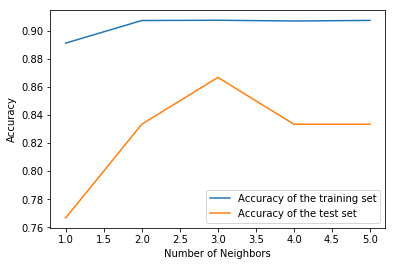

In [35]:
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,6)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()

>> **We found that at neighbors = 3 we are getting the best result**

In [36]:
Knn =  KNeighborsClassifier()
Knn.fit(X_train,y_train)
p = Knn.predict(X_test)
print('Accuracy on the test subset: {:.3f}'.format(accuracy_score(y_test,p)))

Accuracy on the test subset: 0.833


>> **Logistic Regression **

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
p = log_reg.predict(X_test)
accuracy_score(y_test,p)

0.8

In [38]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))


Accuracy on the training subset: 0.891
Accuracy on the test subset: 0.800


In [39]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.891
Accuracy on the test subset: 0.800


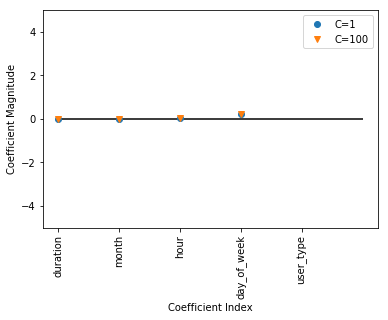

In [40]:
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, 'v', label='C=100')
plt.xticks(range(data_nyc.shape[1]),data_nyc.columns,rotation=90)
plt.hlines(0,0, data_nyc.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.show()

>> **Decision Tree **

Feature importances: [0. 1.]


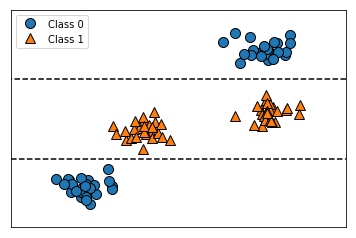

In [41]:
import mglearn 
mglearn.plots.plot_tree_not_monotone()
plt.show()
# How Decision Tree Works 

In [42]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.923
Accuracy on the test subset: 0.767


In [43]:
#With Different value of Depth and Random_state

In [44]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.895
Accuracy on the test subset: 0.800


In [45]:
print('Feature importances: {}'.format(tree.feature_importances_))
print(type(tree.feature_importances_))


Feature importances: [0.70714635 0.01380451 0.06302351 0.21602563]
<class 'numpy.ndarray'>


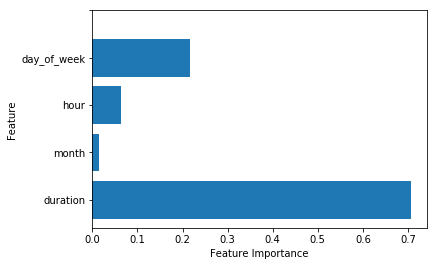

In [46]:
n_features = data_nyc.shape[1]
plt.barh(range(4),tree.feature_importances_)
plt.yticks(np.arange(n_features), ['duration','month','hour','day_of_week'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

## Application

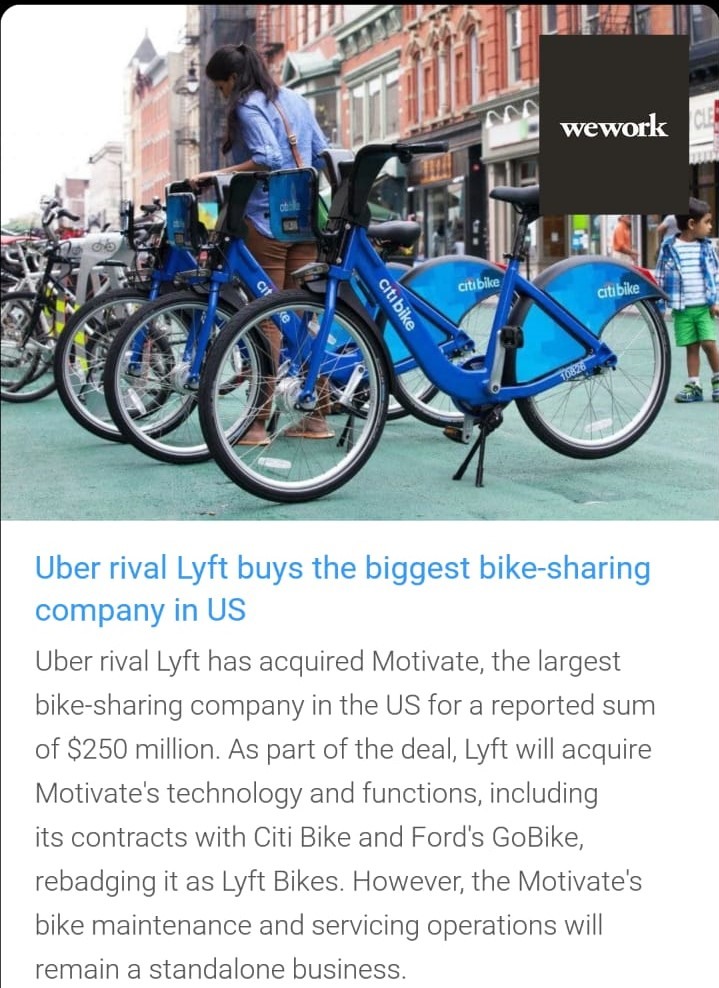

In [47]:
from IPython.core.display import Image, display
display(Image(filename='Lyft_buy.jpeg'))